# CS109A Final Project - Spotify EDA

## Introduction - Features
**Copy-pasted https://developer.spotify.com/documentation/web-api/reference/**
- `duration_ms` (int): The duration of the track in milliseconds.
- `danceability` (float): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/danceability.png height="500" width="500">
- `energy` (float): Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/energy.png height="500" width="500">
- `key` (int): 	The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `loudness` (float): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/loudness.png height="500" width="500">
- `mode` (int): Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- `acousticness` (float): A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/acousticness.png height="500" width="500">
- `instrumentalness` (float): Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/instrumentalness.png height="500" width="500">
- `liveness` (float): 	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/liveness.png height="500" width="500">
- `valence` (float): 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/valence.png height="500" width="500">
- `tempo` (float): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/tempo.png height="500" width="500">
- `popularity` (int): The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

## Basic Statistics

In [243]:
# import necessary libraries
import pandas as pd
import os
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import pd.rpy.common as com
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random


%matplotlib inline

In [11]:
# get path to the folder
DATA_PATH = "../Songs_features/"
All_Files = glob.glob('{}*.csv'.format(DATA_PATH))

In [12]:
# take a few minutes...
list_samples = []
counter = 0

# sample 50 songs from each csv
for file in All_Files:
    df_songs_temp = pd.read_csv(file)
    df_songs_sample = df_songs_temp.sample(n=50, random_state=0)
    list_samples.append(df_songs_sample)
    counter += 1
    # check execution
    if counter % 100 == 0:
        print(counter, "files done!")

# dataframe with 50 songs * 1,000 csv =  50,000 sings   
df_sample = pd.concat(list_samples, sort=False)

100 files done!
200 files done!
300 files done!
400 files done!
500 files done!
600 files done!
700 files done!
800 files done!
900 files done!
1000 files done!


In [19]:
print(df_sample.shape)
print(df_sample.dtypes)
df_sample.head()

(50000, 21)
pid                   int64
pos                   int64
artist_name          object
track_uri            object
artist_uri           object
track_name           object
album_uri            object
duration_ms           int64
album_name           object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
popularity          float64
release_date         object
dtype: object


,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,...,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,popularity,release_date
59091,849,52,Hozier,spotify:track:0IqKeD8ZSP72KbGYyzEcAs,spotify:artist:2FXC3k01G6Gw61bmprjgqS,Take Me To Church,spotify:album:36k5aXpxffjVGcNce12GLZ,241688,Hozier,0.566,...,4.0,-5.303,0.0,0.634000,0.000000,0.1160,0.437,128.945,15.0,2014-07-20
62883,912,19,Coyote Kisses,spotify:track:7cMECL3ApskseQxsXJq3Ii,spotify:artist:1wnrdpW8B0rNCtX5uOSIVL,Six Shooter,spotify:album:6Gp73QX9s7L46TL66rcowH,219800,Six Shooter,0.515,...,10.0,-4.902,0.0,0.000216,0.000283,0.3880,0.914,161.923,56.0,2015-06-01
6588,102,9,Anavan,spotify:track:5VocvgO8CePVzVAJnln2Ew,spotify:artist:4FKVKwQnxAbIvqAIu4mIQE,The Perfect Sound,spotify:album:492VsGrrZx7UNYMxDms5KG,143773,Cover Story,0.892,...,7.0,-7.367,1.0,0.005040,0.000002,0.0912,0.960,131.921,9.0,2008-01-01
16406,249,24,Nick Jonas,spotify:track:5W4vPDfwFNQqt7frRjL41t,spotify:artist:4Rxn7Im3LGfyRkY2FlHhWi,Bacon,spotify:album:4Yww2EYetseL1eL2YuvLna,182946,Last Year Was Complicated,0.709,...,1.0,-5.181,1.0,0.075100,0.000000,0.2720,0.754,143.949,60.0,2016-06-10
6249,97,89,Pink Floyd,spotify:track:5A7eooPKJHtr0UJmatjH4a,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"Another Brick in the Wall, Pt. 3",spotify:album:5Dbax7G8SWrP9xyzkOvy2F,74411,The Wall,0.653,...,2.0,-14.797,1.0,0.055400,0.000064,0.3970,0.448,102.558,58.0,1979-11-30


Please note that `key`, `mode` and `popularity` are `float` in the dataframe.

In [130]:
df_sample.describe()

,pid,pos,duration_ms,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,popularity
count,50000.000000,50000.00000,5.000000e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,502.674560,54.54148,2.353477e+05,0.606822,0.646991,5.180834,-7.260367,0.657337,0.228961,0.058603,0.189925,0.493783,121.416692,43.652216
std,289.691921,48.42878,1.080724e+05,0.162257,0.209070,3.608980,3.671790,0.474605,0.274046,0.191545,0.155970,0.240681,28.771046,25.717029
min,0.000000,0.00000,2.060000e+02,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,254.000000,17.00000,1.990800e+05,0.500000,0.512000,2.000000,-8.698000,0.000000,0.020400,0.000000,0.094700,0.301000,98.911000,21.000000
50%,505.000000,40.00000,2.251050e+05,0.616000,0.677000,5.000000,-6.454000,1.000000,0.102000,0.000004,0.126000,0.489000,120.452000,49.000000
75%,753.000000,80.00000,2.590000e+05,0.725000,0.810000,8.000000,-4.880000,1.000000,0.354000,0.000879,0.241000,0.682000,139.990000,65.000000
max,999.000000,292.00000,1.723290e+07,0.988000,1.000000,11.000000,2.385000,1.000000,0.996000,0.993000,0.995000,0.991000,217.923000,88.000000


Please note that there are 15 missing data points (except for `pid`, `pos` and `duration_ms`).

In [166]:
df_sample = df_sample.dropna()

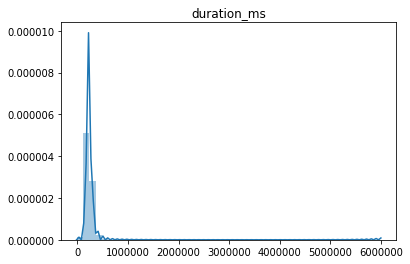

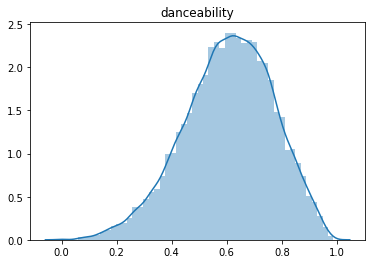

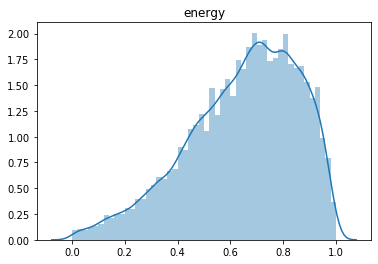

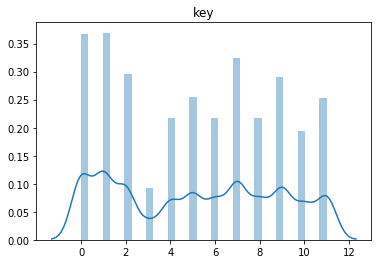

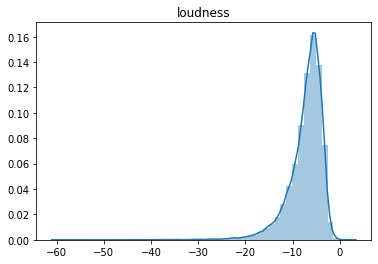

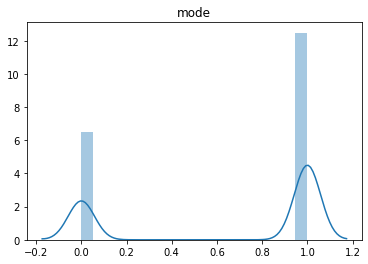

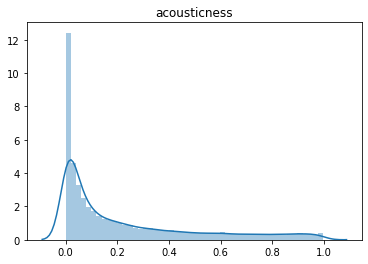

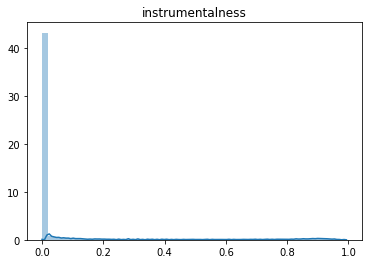

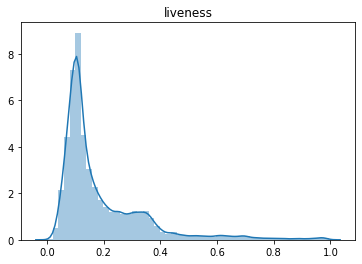

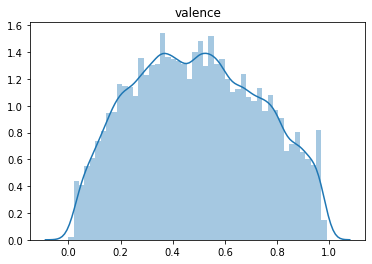

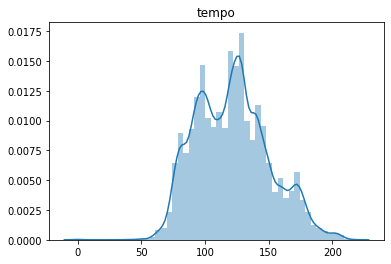

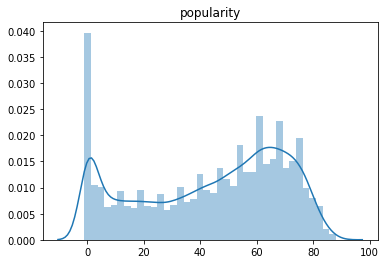

In [168]:
list_columns = np.array(list(df_sample.columns.values))
# list of columns with numeric values
list_columns_params = list(list_columns[[7,9,10,11,12,13,14,15,16,17,18,19]])

# seaborn distribution plot
for i in range(len(list_columns_params)):
    column = list_columns_params[i]
    data_param = np.array(df_sample[column])

    sns.distplot(data_param)
    plt.title(column)
    plt.show()

## Correlation Matrix

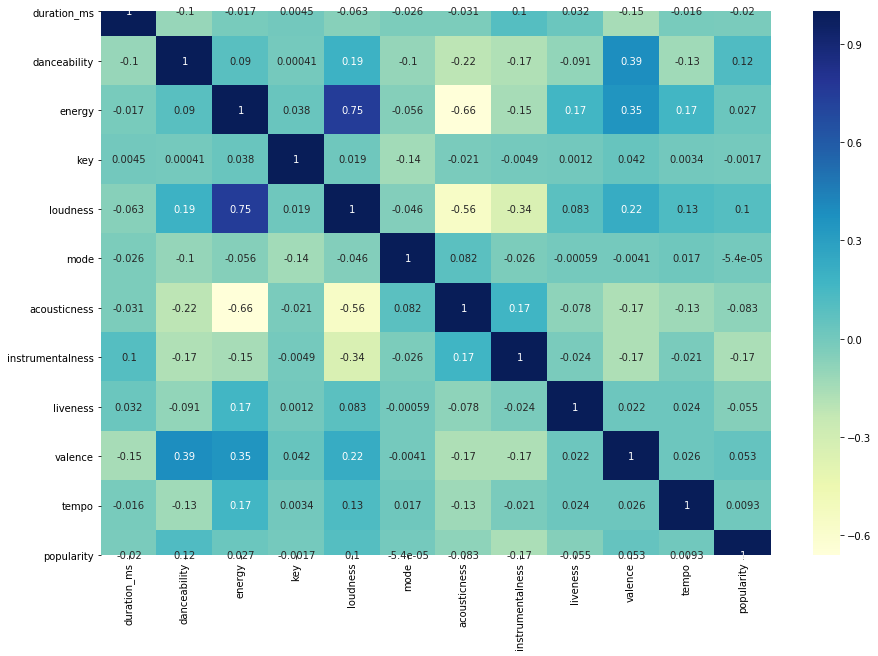

In [251]:
params = ["duration_ms", "danceability", "energy", "key", "loudness", "mode", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "popularity"]
df_sample_params = df_sample.loc[:,params]

# calculate the correlation matrix
corr = df_sample_params.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="YlGnBu",annot=True,ax=ax);

There is a correlation between `loudness` and `energy`.

## Which features are influential in creating the playlists?

In [270]:
# take a few minutes...
list_pid = list(range(1000))
number_of_playlist = 1000
cv_all = []
counter_file = 1

# choose 5 playlists from each csv: 5 playlists * 1000 csv = 5000 playlists
for file in All_Files:
    random.seed(counter_file)
    selected_pid = np.random.choice(list_pid, size=5)
    
    # for each playlists, calculate coefficient of variation
    for pid in list(selected_pid):
        df_songs_temp = pd.read_csv(file)
        df_songs_temp_selected = df_songs_temp[df_songs_temp["pid"] == pid]
        df_songs_temp_params = df_songs_temp_selected.loc[:,params]
        
        cv_each_playlist = []
        
        for param in params:
            df_temp_one_column = df_songs_temp_params.loc[:,param]
            mean = df_temp_one_column.mean()
            standard_deviation = df_temp_one_column.std()
            if mean != 0:
                coeffficient_of_variation = standard_deviation / mean
                cv_each_playlist.append(coeffficient_of_variation)
            else:
                cv_each_playlist.append(None)
            
        cv_all.append(cv_each_playlist)
        
    if counter_file % 100 == 0:
        print(counter_file, "files done!")
    counter_file += 1   

100 files done!
200 files done!
300 files done!
400 files done!
500 files done!
600 files done!
700 files done!
800 files done!
900 files done!
1000 files done!


In [303]:
counter_playlists = 1
df_cov = pd.DataFrame(columns=params)

for i in range(len(cv_all)):
    df_cov = df_cov.append(pd.Series(cv_all[i], index=df_cov.columns), ignore_index=True)
    
    if counter_playlists % 500 == 0:
        print(counter_playlists, "playlists done!")
        
    counter_playlists += 1

500 playlists done!
1000 playlists done!
1500 playlists done!
2000 playlists done!
2500 playlists done!
3000 playlists done!
3500 playlists done!
4000 playlists done!
4500 playlists done!
5000 playlists done!


In [312]:
df_cov = df_cov.dropna()
print(df_cov.shape)
df_cov.head()

(4989, 12)


,duration_ms,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,0.250221,0.208026,0.278827,0.731292,-0.545947,1.283018,1.438070,1.135218,0.595032,0.546320,0.201902,0.739693
1,0.161670,0.313320,0.163026,0.740350,-0.398302,1.162563,3.499695,5.261348,0.716594,0.467672,0.250003,0.416910
2,0.276436,0.259162,0.216287,0.592526,-0.452762,1.395678,1.220731,1.941244,0.518225,0.452830,0.233477,0.481808
3,0.102838,0.185237,0.277960,0.644061,-0.211981,0.496139,1.203048,3.440483,0.624487,0.595905,0.262340,0.988077
4,0.164834,0.237344,0.279067,0.631148,-0.407200,0.833294,1.369058,7.461030,0.780669,0.445361,0.233862,0.439762


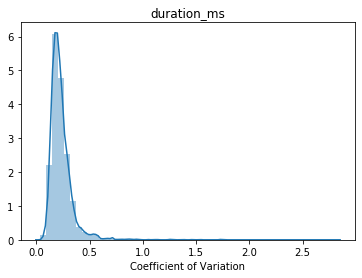

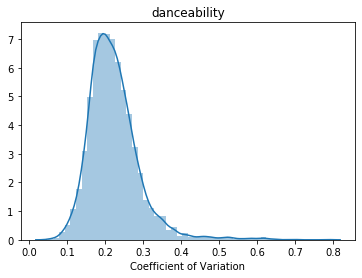

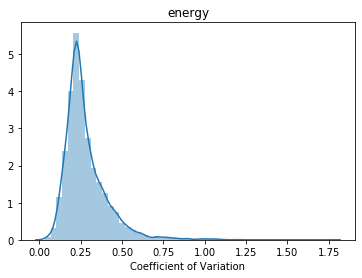

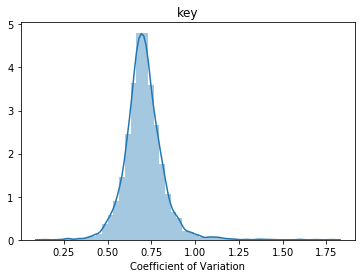

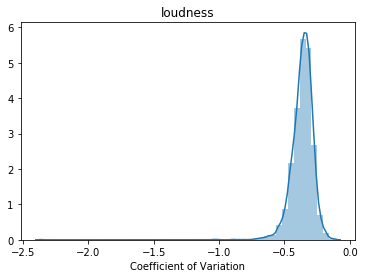

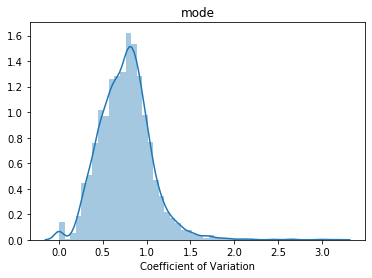

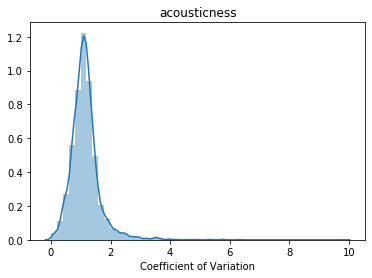

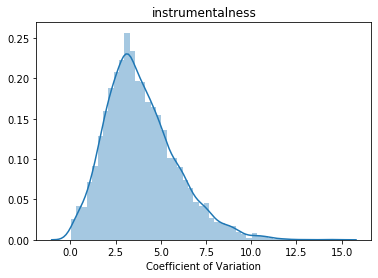

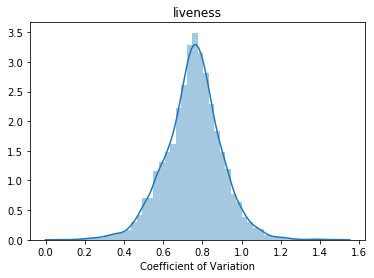

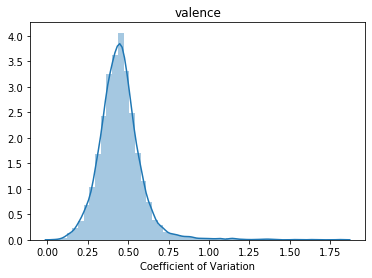

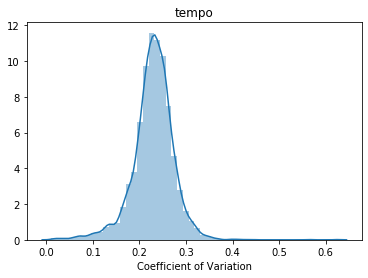

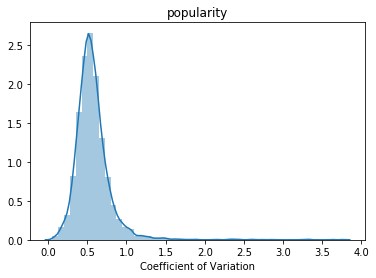

In [315]:
for i in range(len(list_columns_params)):
    column = list_columns_params[i]
    data_param = np.array(df_sample[column])

    sns.distplot(df_cov.iloc[:,i])
    plt.xlabel("Coefficient of Variation")
    plt.title(column)
    plt.show()

In [316]:
df_cov.var()

duration_ms         0.013984
danceability        0.004706
energy              0.016898
key                 0.012602
loudness            0.007036
mode                0.087278
acousticness        0.262383
instrumentalness    3.815531
liveness            0.021043
valence             0.017832
tempo               0.001945
popularity          0.055224
dtype: float64

## Clustering

In [320]:
# K-Means Clustering

sample_params_array = np.array([#df_sample_params["duration_ms"].tolist(),
                                df_sample_params["danceability"].tolist(),
                                df_sample_params["energy"].tolist(),
                                #df_sample_params["key"].tolist(),
                                #df_sample_params["loudness"].tolist(),
                                #df_sample_params["mode"].tolist(),
                                df_sample_params["acousticness"].tolist(),
                                #df_sample_params["instrumentalness"].tolist(),
                                df_sample_params["liveness"].tolist(),
                                df_sample_params["valence"].tolist(),
                                df_sample_params["tempo"].tolist()
                                #df_sample_params["popularity"].tolist()
])

sample_params_array = sample_params_array.T

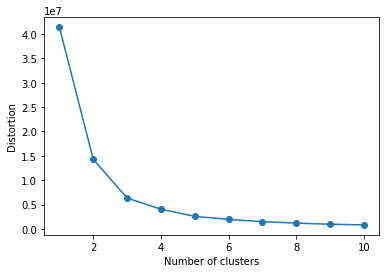

In [321]:
# Elbow method
distortions = []

for i in range(1,11):
    clusterer = KMeans(n_clusters=i, random_state=0)
    clusterer.fit(sample_params_array)
    cluster_labels = clusterer.fit_predict(sample_params_array)
    distortions.append(clusterer.inertia_)
    
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

For n_clusters = 1 The average silhouette_score is : 0.5244507527758723
For n_clusters = 2 The average silhouette_score is : 0.5244507527758723
For n_clusters = 3 The average silhouette_score is : 0.5244507527758723
For n_clusters = 4 The average silhouette_score is : 0.5244507527758723
For n_clusters = 5 The average silhouette_score is : 0.5244507527758723
For n_clusters = 6 The average silhouette_score is : 0.5244507527758723


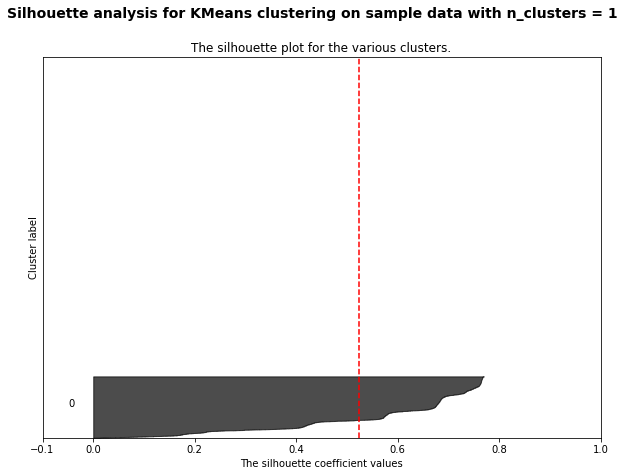

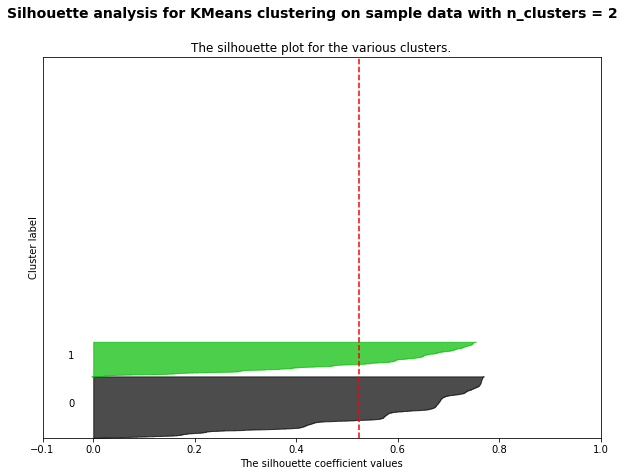

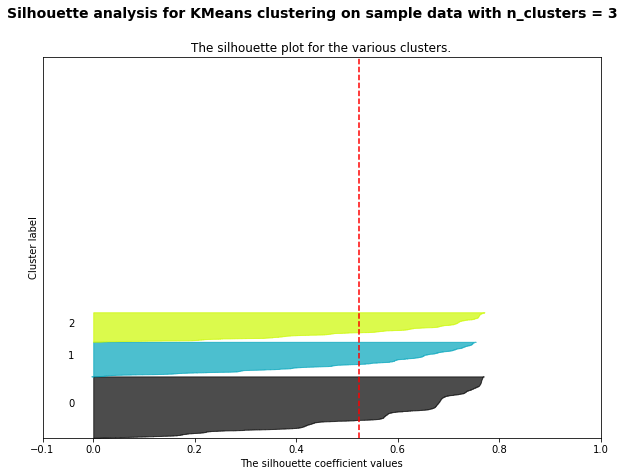

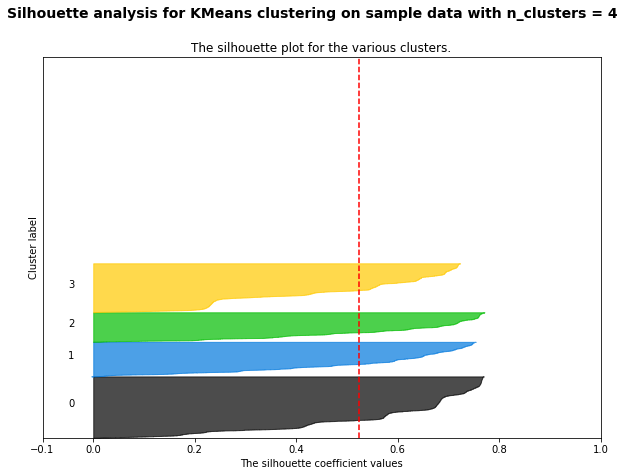

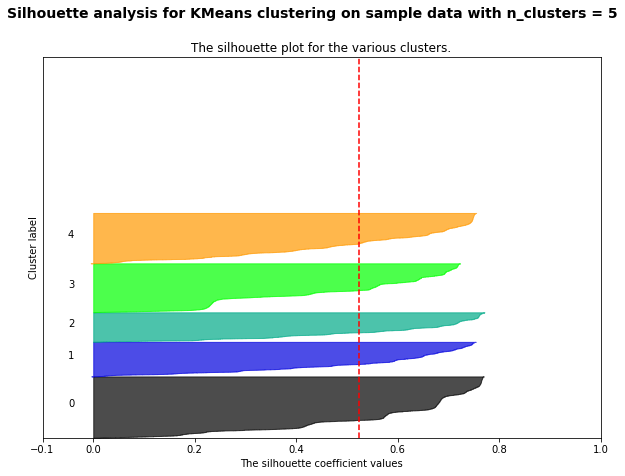

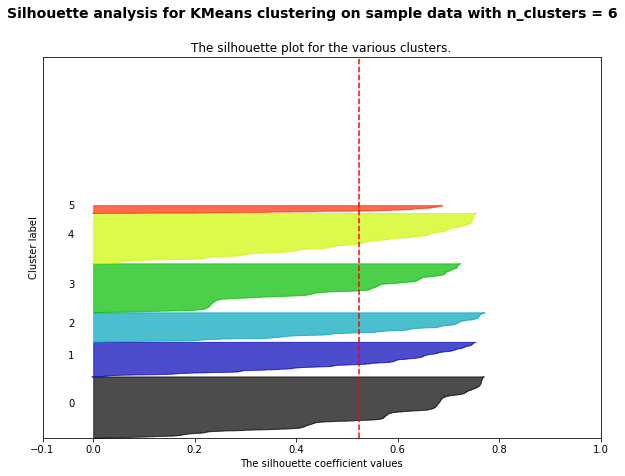

In [327]:
# take a few minutes...
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py%5D

for n_clusters in range(1,7):
    
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # the silhouette plot
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(sample_params_array) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sample_params_array, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sample_params_array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

`n_clusters = 3` is the optimal value for the K-Means Clustering according to the elbow method and the silhouette analysis above.

## `n_clusters = 3`

In [332]:
clusterer_3 = KMeans(n_clusters=3, random_state=0)
clusterer_3.fit(sample_params_array)
cluster_labels = clusterer_3.fit_predict(sample_params_array)

df_sample_params["cluster_id"] = clusterer_labels

for i in range(3):
    print(df_sample_params[df_sample_params["cluster_id"] == i].mean(),"\n")

duration_ms         220683.619899
danceability             0.624399
energy                   0.675843
key                      5.198053
loudness                -6.523258
mode                     0.648452
acousticness             0.193656
instrumentalness         0.031510
liveness                 0.186590
valence                  0.512412
tempo                  121.662208
popularity              45.254690
cluster_id               0.000000
dtype: float64 

duration_ms         382496.277625
danceability             0.529284
energy                   0.607298
key                      5.227048
loudness                -8.888688
mode                     0.622320
acousticness             0.252497
instrumentalness         0.185220
liveness                 0.217857
valence                  0.402016
tempo                  120.893630
popularity              36.885651
cluster_id               1.000000
dtype: float64 

duration_ms         3.741162e+06
danceability        3.982250e-01
energy          

## `n_clusters = 4`

In [333]:
clusterer_4 = KMeans(n_clusters=4, random_state=0)
clusterer_4.fit(sample_params_array)
cluster_labels = clusterer_4.fit_predict(sample_params_array)

df_sample_params["cluster_id"] = clusterer_labels

for i in range(4):
    print(df_sample_params[df_sample_params["cluster_id"] == i].mean(),"\n")

duration_ms         220683.619899
danceability             0.624399
energy                   0.675843
key                      5.198053
loudness                -6.523258
mode                     0.648452
acousticness             0.193656
instrumentalness         0.031510
liveness                 0.186590
valence                  0.512412
tempo                  121.662208
popularity              45.254690
cluster_id               0.000000
dtype: float64 

duration_ms         382496.277625
danceability             0.529284
energy                   0.607298
key                      5.227048
loudness                -8.888688
mode                     0.622320
acousticness             0.252497
instrumentalness         0.185220
liveness                 0.217857
valence                  0.402016
tempo                  120.893630
popularity              36.885651
cluster_id               1.000000
dtype: float64 

duration_ms         3.741162e+06
danceability        3.982250e-01
energy          

## `n_clusters = 5`

In [334]:
clusterer_5 = KMeans(n_clusters=5, random_state=0)
clusterer_5.fit(sample_params_array)
cluster_labels = clusterer_5.fit_predict(sample_params_array)

df_sample_params["cluster_id"] = clusterer_labels

for i in range(5):
    print(df_sample_params[df_sample_params["cluster_id"] == i].mean(),"\n")

duration_ms         220683.619899
danceability             0.624399
energy                   0.675843
key                      5.198053
loudness                -6.523258
mode                     0.648452
acousticness             0.193656
instrumentalness         0.031510
liveness                 0.186590
valence                  0.512412
tempo                  121.662208
popularity              45.254690
cluster_id               0.000000
dtype: float64 

duration_ms         382496.277625
danceability             0.529284
energy                   0.607298
key                      5.227048
loudness                -8.888688
mode                     0.622320
acousticness             0.252497
instrumentalness         0.185220
liveness                 0.217857
valence                  0.402016
tempo                  120.893630
popularity              36.885651
cluster_id               1.000000
dtype: float64 

duration_ms         3.741162e+06
danceability        3.982250e-01
energy          